## KoNLP
+ NLTK는 영어정보처리를 위한 패키지
+ 반면, KoNLPy는 한국어 정보처리를 위한 패키지
+ 이미 개발된 한글 형태소 분석기를 파이썬에서 사용할 수 있게 해주는 도우미 wrapper 패키지
    - hanannum, Kkma, Komoran, mecab, Okt(twitter)
+ konlpy.org/ko

In [1]:
! pip install konlpy
! pip install tweepy==3.10.0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import konlpy

In [3]:
from konlpy.tag import Okt

In [10]:
twitter=Okt()

In [4]:
txt1 = '아버지가방에들어가신다'
txt2 = '아버지가 방에 들어가신다'
txt3 = '또 올라? 치킨이 2만원... 소비자에 비용상승 전가'

In [11]:
twitter.pos(txt1)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [12]:
twitter.pos(txt2)

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [13]:
twitter.pos(txt3)

[('또', 'Noun'),
 ('올라', 'Verb'),
 ('?', 'Punctuation'),
 ('치킨', 'Noun'),
 ('이', 'Josa'),
 ('2만원', 'Number'),
 ('...', 'Punctuation'),
 ('소비자', 'Noun'),
 ('에', 'Josa'),
 ('비용', 'Noun'),
 ('상승', 'Noun'),
 ('전가', 'Noun')]

### 형태소 분석 : (어간추출stemming) : morphs(객체명, stem = True)
+ 각 단어의 원형을 추출해서 출력

In [14]:
twitter.morphs(txt1, stem=True)
twitter.morphs(txt2, stem=True)
twitter.morphs(txt3, stem=True)

['또', '오르다', '?', '치킨', '이', '2만원', '...', '소비자', '에', '비용', '상승', '전가']

### 명사추출 : nouns(객체명)

In [15]:
twitter.nouns(txt1)
twitter.nouns(txt2)
twitter.nouns(txt3)

['또', '치킨', '소비자', '비용', '상승', '전가']

#### 대한민국 헌법 말뭉치 : kolaw
#### 국회 법안 말뭉치 : kobill

In [16]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [17]:
kolaw.fileids()   # 말뭉치 파일명 출력
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

### 내장 말뭉치 확인

In [102]:
docs = kolaw.open('constitution.txt').read()

In [19]:
docs[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

#### 대한민국 헌법 말뭉치에서 자주 언급되는 단어 분석

In [20]:
from collections import Counter

In [103]:
words = twitter.nouns(docs)   # 품사 중

In [104]:
words[:10]

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

In [105]:
wc= Counter(words)# 단어별 빈도 분석

In [106]:
wc.most_common(25)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55),
 ('헌법', 53),
 ('그', 47),
 ('이', 38),
 ('모든', 37),
 ('바', 37),
 ('위', 36),
 ('기타', 26),
 ('및', 25),
 ('사항', 23),
 ('권리', 21),
 ('안', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20)]

#### 추출된 명사에서 2자 이상만을 다시 추출해서 단어 빈도 분석


In [107]:
tokens = twitter.nouns(docs)

In [112]:
words = [t for t in tokens if len(t) >= 2]

In [ ]:
words

In [113]:
wc= Counter(words)

#### 대한민국 헌법 말뭉치를 이용해서 워드클라우드로 시각화

In [26]:
from wordcloud import WordCloud

In [27]:
import matplotlib.pyplot as plt

In [114]:
wc = dict(wc.most_common(25))

In [115]:
wc

{'법률': 127,
 '대통령': 83,
 '국가': 73,
 '국회': 68,
 '국민': 61,
 '헌법': 53,
 '모든': 37,
 '기타': 26,
 '사항': 23,
 '권리': 21,
 '의원': 21,
 '자유': 20,
 '정부': 20,
 '선거': 20,
 '임명': 20,
 '직무': 19,
 '국무총리': 19,
 '경제': 18,
 '의무': 18,
 '조직': 18,
 '국회의원': 18,
 '임기': 18,
 '의결': 17,
 '공무원': 17,
 '경우': 17}

In [45]:
import numpy as np
from PIL import Image

In [52]:
korfont = '/usr/share/fonts/NanumGothic.ttf'

In [46]:
mask_path = 'img/h.jpg'
mask = np.array(Image.open(mask_path))

(-0.5, 1199.5, 1095.5, -0.5)

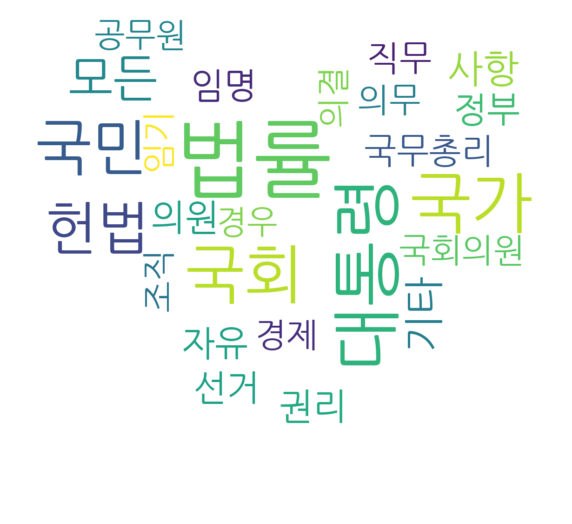

In [116]:
wcimg = WordCloud(background_color = 'white', mask = mask, font_path = korfont).generate_from_frequencies(wc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation = 'bilinear')
plt.axis('off')

#### 트럼프 연설에서 2자 이상 단어 추출하기

In [54]:
with open('data/trump_ko.txt') as f:
    docs1 = f.read()

In [ ]:
tokens1 = twitter.nouns(docs1)

In [ ]:
words1 = [t for t in tokens1 if len(t) >= 2]

In [ ]:
wc1 = Counter(words1)

In [72]:
wc1 = dict(wc1.most_common(25))

In [ ]:
mask_path = 'img/h.jpg'
mask = np.array(Image.open(mask_path))

(-0.5, 1199.5, 1095.5, -0.5)

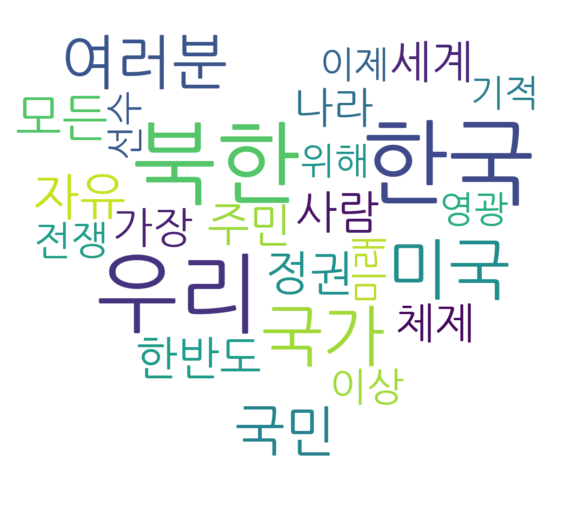

In [76]:
wcimg1 = WordCloud(background_color = 'white', mask = mask, font_path = korfont).generate_from_frequencies(wc1)
plt.figure(figsize=(10,10))
plt.imshow(wcimg1, interpolation = 'bilinear')
plt.axis('off')

#### 잡스 연설에서 2자리 이상 단어 추출하기

In [90]:
with open('data/stevejobs_ko.txt') as f:
    docs2 = f.read()

In [91]:
tokens2 = twitter.nouns(docs2)

In [92]:
words2 = [t for t in tokens2 if len(t) >= 2]

In [93]:
wc2 = Counter(words2)

In [94]:
wc2 = dict(wc2.most_common(25))

(-0.5, 1199.5, 1095.5, -0.5)

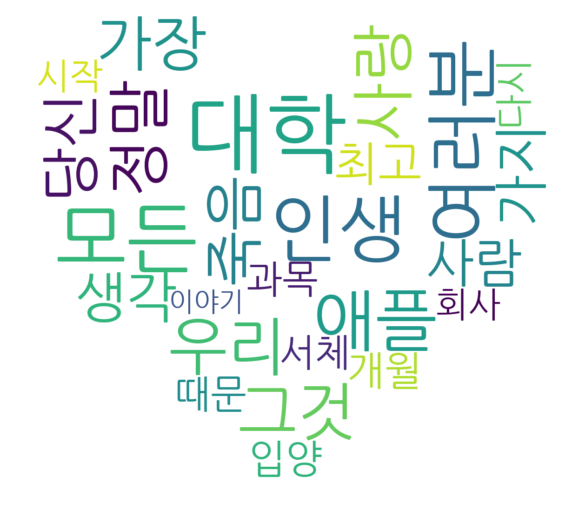

In [95]:
wcimg2 = WordCloud(background_color = 'white', mask = mask, font_path = korfont).generate_from_frequencies(wc2)
plt.figure(figsize=(10,10))
plt.imshow(wcimg2, interpolation = 'bilinear')
plt.axis('off')